<b>Mini Project</b><br>
<b>Student Name & Student ID:</b> <br>
    1. RAUDHATUL SAADAH BINTI ABDUL RAZAK - 52213122400 <br>
    2. PUTRI NURSYAZANA BINTI MUSTAFA KAMAL - 52213122010 <br>
    3. WAN NURUL EZZAH BINTI SAHARDI - 52213123227 <br>
<br>
<b>Domain</b> <br>
Animal Subspecies - <i>Dog</i>

---

library

In [1]:
import os
import requests
from bs4 import BeautifulSoup
import urllib.parse
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import shutil
from sklearn.model_selection import train_test_split

<b>1. Data Preparation</b>

In [2]:
def fetch_image(img_url, output_path, index, query):
    try:
        img_data = requests.get(img_url).content
        with open(os.path.join(output_path, f"{query.replace(' ', '_')}_{index}.jpg"), 'wb') as handler:
            handler.write(img_data)
        print(f"Downloaded {query.replace(' ', '_')}_{index}.jpg")
    except Exception as e:
        print(f"Could not download image {index}: {e}")

def download_images(query, num_images, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    headers = {"User-Agent": "Mozilla/5.0"}
    query_encoded = urllib.parse.quote(query)
    downloaded = 0
    page = 0

    keywords = ['chart', 'graph', 'map', 'maps', 'dog', 'location', 'locations', 'genotypes', 'statistics', 'cartoon']
    capital_keywords = [keyword.capitalize() for keyword in keywords]
    all_keywords = keywords + capital_keywords

    with ThreadPoolExecutor(max_workers=10) as executor:
        future_to_img = {}
        
        while downloaded < num_images:
            search_url = f"https://www.google.com/search?q={query_encoded}&tbm=isch&start={page*20}"
            response = requests.get(search_url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            img_tags = soup.find_all('img')[1:]
            
            if not img_tags:
                break
            
            for i, img in enumerate(img_tags):
                if downloaded >= num_images:
                    break
                try:
                    img_url = img.get('src') or img.get('data-src')
                    alt_text = img.get('alt', '').lower()
                    
                    if not img_url or not img_url.startswith('http'):
                        continue
                    
                    # Additional filtering to avoid downloading irrelevant images
                    if any(keyword in alt_text for keyword in all_keywords):
                        continue
                    if any(keyword in img_url for keyword in all_keywords):
                        continue
                    
                    future = executor.submit(fetch_image, img_url, output_dir, downloaded, query)
                    future_to_img[future] = downloaded
                    downloaded += 1
                except Exception as e:
                    print(f"Could not process image {downloaded}: {e}")
            
            page += 1
            time.sleep(1)
        
        for future in as_completed(future_to_img):
            future.result()

# Start the crawling process with error handling
def main():
    queries = [
        ("picture of fully grown californian rabbit", 1000, "data/californian_rabbit"),
        ("picture of fully grown German Lop rabbit", 1000, "data/German_Lop"),
        ("picture of fully grown Blanc de Bouscat rabbit", 1000, "data/Blanc_de_Bouscat"),
        ("picture of fully grown Belgian Hare rabbit", 1000, "data/Belgian_Hare"),
        ("picture of fully grown Dwarf Hotot rabbit", 1000, "data/Dwarf_Hotot"),
        ("picture of fully grown Harlequin rabbit", 1000, "data/Harlequin"),
        ("picture of fully grown continental giant rabbit", 1000, "data/continental_giant_rabbit"),
        ("picture of fully grown Lionhead rabbit", 1000, "data/Lionhead"),
        ("picture of fully grown thrianta rabbit", 1000, "data/thrianta"),
        ("picture of fully grown Miniature Lop rabbit", 1000, "data/Miniature_Lop")
    ]
    
    for query, num_images, output_dir in queries:
        print(f"Starting download for {query}...")
        download_images(query, num_images, output_dir)
        time.sleep(1)

if __name__ == "__main__":
    main()


Starting download for picture of fully grown californian rabbit...
Downloaded picture_of_fully_grown_californian_rabbit_9.jpg
Downloaded picture_of_fully_grown_californian_rabbit_5.jpg
Downloaded picture_of_fully_grown_californian_rabbit_6.jpg
Downloaded picture_of_fully_grown_californian_rabbit_0.jpg
Downloaded picture_of_fully_grown_californian_rabbit_1.jpg
Downloaded picture_of_fully_grown_californian_rabbit_8.jpg
Downloaded picture_of_fully_grown_californian_rabbit_7.jpg
Downloaded picture_of_fully_grown_californian_rabbit_3.jpg
Downloaded picture_of_fully_grown_californian_rabbit_4.jpg
Downloaded picture_of_fully_grown_californian_rabbit_2.jpg
Downloaded picture_of_fully_grown_californian_rabbit_12.jpg
Downloaded picture_of_fully_grown_californian_rabbit_11.jpg
Downloaded picture_of_fully_grown_californian_rabbit_14.jpg
Downloaded picture_of_fully_grown_californian_rabbit_10.jpg
Downloaded picture_of_fully_grown_californian_rabbit_13.jpg
Downloaded picture_of_fully_grown_californi

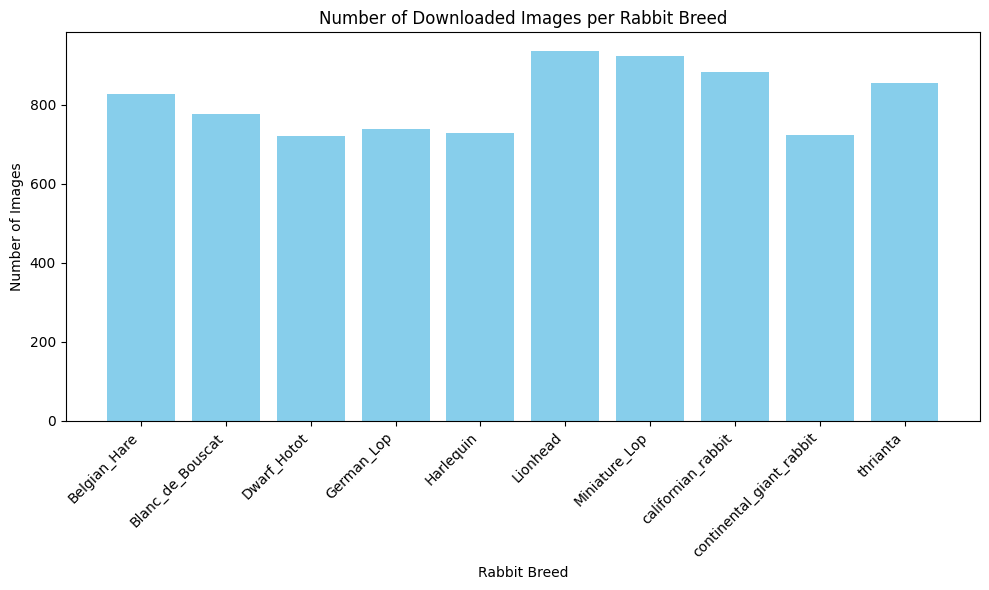

In [3]:
import os
import matplotlib.pyplot as plt

directories = [
    "data/californian_rabbit",
    "data/German_Lop",
    "data/Blanc_de_Bouscat",
    "data/Belgian_Hare",
    "data/Dwarf_Hotot",
    "data/Harlequin",
    "data/continental_giant_rabbit",
    "data/Lionhead",
    "data/thrianta",
    "data/Miniature_Lop"
]

breed_counts = {}

for directory in directories:
    breed_name = os.path.basename(directory)  # Extract the breed name from the directory path
    if os.path.exists(directory):
        num_files = len(os.listdir(directory))
        breed_counts[breed_name] = num_files

sorted_counts = dict(sorted(breed_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Rabbit Breed')
plt.ylabel('Number of Images')
plt.title('Number of Downloaded Images per Rabbit Breed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


<br>
<b>Split dataset --> training, validation, testing</b>

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_split_directories(base_dir, categories, splits):
    for split in splits:
        for category in categories:
            split_dir = os.path.join(base_dir, split, category)
            os.makedirs(split_dir, exist_ok=True)

def split_data(base_dir, categories, split_ratios):
    train_ratio, val_ratio, test_ratio = split_ratios
    splits = ['train', 'validation', 'test']
    create_split_directories(base_dir, categories, splits)
    
    for category in categories:
        category_dir = os.path.join(base_dir, category)
        images = [img for img in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, img))]
        train_and_val, test = train_test_split(images, test_size=test_ratio, random_state=42)
        train, val = train_test_split(train_and_val, test_size=val_ratio/(train_ratio + val_ratio), random_state=42)
        
        for split, split_images in zip(splits, [train, val, test]):
            split_dir = os.path.join(base_dir, split, category)
            for image in split_images:
                shutil.move(os.path.join(category_dir, image), os.path.join(split_dir, image))

# Define base directory and categories
base_dir = "data"
categories = ["californian_rabbit", "German_Lop", "Blanc_de_Bouscat", "Belgian_Hare",
              "Dwarf_Hotot", "Harlequin", "continental_giant_rabbit", "Lionhead", "thrianta", "Miniature_Lop"]

# Define split ratios: 70% training, 15% validation, 15% testing
split_ratios = (0.7, 0.15, 0.15)

# Perform the split
split_data(base_dir, categories, split_ratios)


In [1]:
!pip install tensorflow keras matplotlib scikit-learn

when downloading the dataset, put it in a different file which is the American Eskimo dog file, Siberian husky file, etc in the data folder
but when we split the dataset it will generate folder test, train & validation. <br>
it will put the dataset image in that folder. It will split to 70%, 15%, 15% for each of the folder.

---

<b>Data Modelling</b>

train using resnet50

train using DenseNet121

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, average_precision_score

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=False
)

# Build model using DenseNet121
def build_densenet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_densenet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_densenet_model.keras', monitor='val_loss', save_best_only=True)

history_densenet121 = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[checkpoint], verbose=1)

# Evaluate model
model.load_weights('best_densenet_model.keras')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")


Found 7700 images belonging to 10 classes.
Found 3585 images belonging to 10 classes.
Found 2768 images belonging to 10 classes.
Epoch 1/50


C:\Users\User\.conda\envs\ISB46703\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1235 - loss: 3.4198

KeyboardInterrupt: 

In [ ]:
#trainDenseNet121 2.0
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build model using DenseNet121
def build_densenet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    
    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_densenet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_densenet_model.keras', monitor='val_loss', save_best_only=True)
csv_logger = CSVLogger('training_log_denseNet121.csv', append=True)

history_densenet121 = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

# Evaluate model
model.load_weights('best_densenet_model.keras')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define constants
base_dir = 'data'
img_height, img_width = 224, 224
batch_size = 32
epochs = 50

# Create TensorFlow datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42,
    shuffle=False
)

# Extract class names
class_names = train_ds.class_names
num_classes = len(class_names)


Found 7700 files belonging to 10 classes.
Found 3585 files belonging to 10 classes.
Found 2768 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_mobilenetv3(version='small', input_shape=(224, 224, 3), num_classes=1000):
    if version == 'small':
        base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, weights='imagenet', include_top=False)
    elif version == 'large':
        base_model = tf.keras.applications.MobileNetV3Large(input_shape=input_shape, weights='imagenet', include_top=False)
    else:
        raise ValueError("Version should be either 'small' or 'large'.")

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define your input shape and number of classes
img_height, img_width = 224, 224
num_classes = 10  # Change this according to your dataset
epochs = 50  # Adjust the number of epochs as needed

# Build the models
mobilenetv3_small = build_mobilenetv3(version='small', input_shape=(img_height, img_width, 3), num_classes=num_classes)
mobilenetv3_large = build_mobilenetv3(version='large', input_shape=(img_height, img_width, 3), num_classes=num_classes)

# Callbacks
checkpoint_small = ModelCheckpoint('best_mobilenetv3_small_model.keras', monitor='val_loss', save_best_only=True)
checkpoint_large = ModelCheckpoint('best_mobilenetv3_large_model.keras', monitor='val_loss', save_best_only=True)
csv_logger_small = CSVLogger('training_log_mobilenetv3_small.csv', append=True)
csv_logger_large = CSVLogger('training_log_mobilenetv3_large.csv', append=True)

# Assuming train_ds, val_ds, and test_ds are predefined datasets
# Train the models
history_mobilenetv3_small = mobilenetv3_small.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint_small, csv_logger_small],
    verbose=1
)

history_mobilenetv3_large = mobilenetv3_large.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint_large, csv_logger_large],
    verbose=1
)

# Load best weights and evaluate
mobilenetv3_small.load_weights('best_mobilenetv3_small_model.keras')
eval_results_small = mobilenetv3_small.evaluate(test_ds, verbose=1)
print(f"MobileNetV3 Small - Test Loss: {eval_results_small[0]}")
print(f"MobileNetV3 Small - Test Accuracy: {eval_results_small[1]}")

mobilenetv3_large.load_weights('best_mobilenetv3_large_model.keras')
eval_results_large = mobilenetv3_large.evaluate(test_ds, verbose=1)
print(f"MobileNetV3 Large - Test Loss: {eval_results_large[0]}")
print(f"MobileNetV3 Large - Test Accuracy: {eval_results_large[1]}")


In [ ]:
import matplotlib.pyplot as plt

# Visualization of training process
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} - Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

# Plotting the training history for both models
plot_training_history(history_mobilenetv3_small, 'MobileNetV3 Small')
plot_training_history(history_mobilenetv3_large, 'MobileNetV3 Large')


Accuracy Visualization of Training History

In [ ]:
import matplotlib.pyplot as plt

# Plot training history for ResNet50
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='train_accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='val_accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='train_loss')
plt.plot(history_resnet50.history['val_loss'], label='val_loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot training history for DenseNet121
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_densenet121.history['accuracy'], label='train_accuracy')
plt.plot(history_densenet121.history['val_accuracy'], label='val_accuracy')
plt.title('DenseNet121 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_densenet121.history['loss'], label='train_loss')
plt.plot(history_densenet121.history['val_loss'], label='val_loss')
plt.title('DenseNet121 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot training history for MobileNetV3
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenetv3.history['accuracy'], label='train_accuracy')
plt.plot(history_mobilenetv3.history['val_accuracy'], label='val_accuracy')
plt.title('MobileNetV3 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenetv3.history['loss'], label='train_loss')
plt.plot(history_mobilenetv3.history['val_loss'], label='val_loss')
plt.title('MobileNetV3 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('best_densenet_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))
